In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Problem 2

## a) Load data

In [58]:
df = pd.read_csv('Ch12EX13.csv', header=None)
X = np.array(df)

## b) Hierarchical clustering 

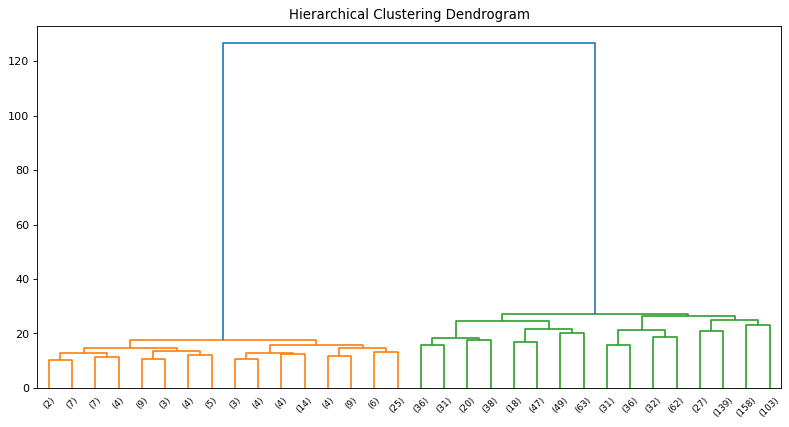

In [59]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(X)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)

# plot the top four levels of the dendrogram
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(model, truncate_mode="level", p=4)

the genes separate the samples into the two groups

## c) Which gene differs the most

I suggest using t-test between 2 groups and compare the p_value of each gene. The one with the smallest p_value differs the most.

In [72]:
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(X)
X_new = np.append(X, model.labels_.reshape((1000,-1)), 1)
import scipy.stats as stats

p_value_list = []
for col in range(X_new.shape[1]-1):

    data_group1 = X_new[X_new[:, 40]==1][:, col]
    
    data_group2 = X_new[X_new[:, 40]==0][:, col]

    p_value = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=False).pvalue
    p_value_list.append(p_value)

The gene that differs the most is 

In [77]:
min_index = p_value_list.index(min(p_value_list))
min_index + 1

38

p_value is 

In [78]:
min(p_value_list)

3.2204426748551586e-51